In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # for data import/data wrangling
import seaborn as sns # for statistical visualization

In [2]:
# Load the data set

titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Let us select only the necessary columns for our data analysis:

In [6]:
titanic = titanic.loc[:, ["Survived", "Pclass", "Sex", "Age", "Fare"]]
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
titanic.shape

(891, 5)

In [8]:
titanic.value_counts("Pclass")

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
titanic.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [10]:
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [11]:
# Histogram: numerical variables

<Axes: xlabel='Age', ylabel='Count'>

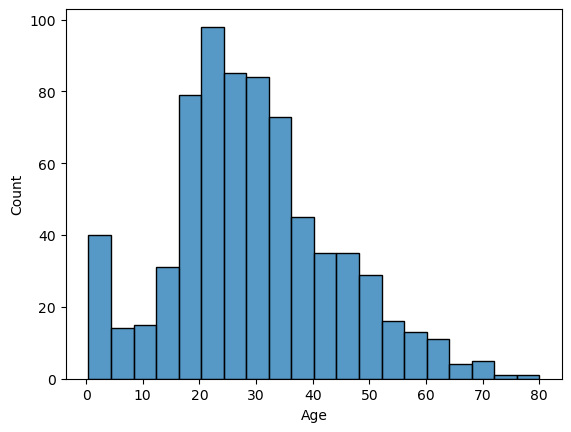

In [12]:
# histogram of age?
sns.histplot(titanic, x = 'Age')

<Axes: xlabel='Age', ylabel='Proportion'>

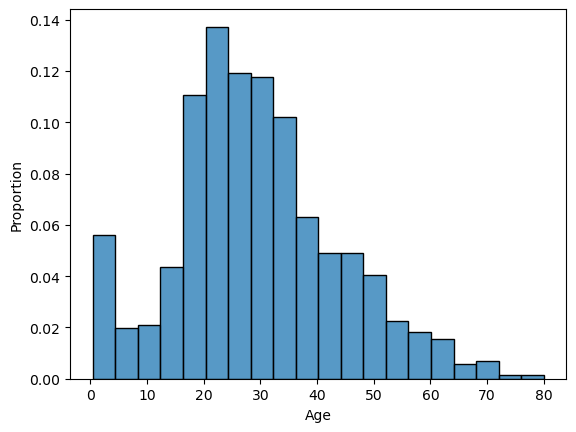

In [13]:
# relative frequency of age groups
sns.histplot(titanic, x = "Age", stat = "proportion")

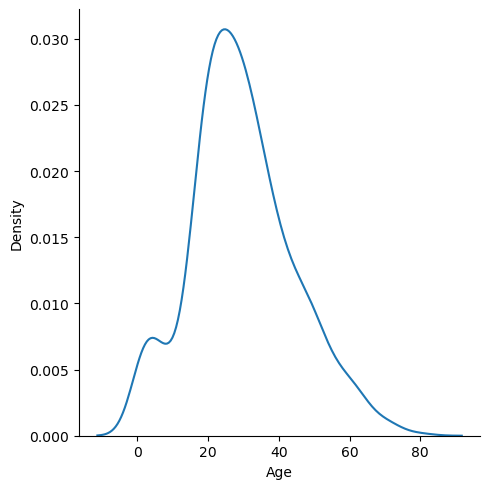

In [14]:
# density plot: continuous version of the histogram
sns.displot(titanic, x = "Age", kind = "kde")

<Axes: xlabel='Age', ylabel='Count'>

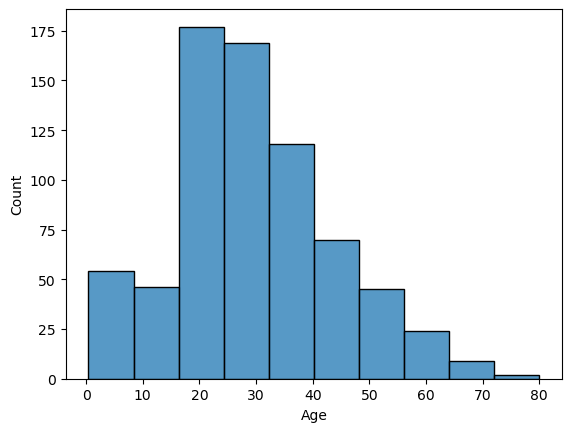

In [15]:
# We can change the number of bins
sns.histplot(titanic, x = "Age", bins = 10)

In [16]:
# How to compare histogram of age across different groups?

<Axes: xlabel='Age', ylabel='Count'>

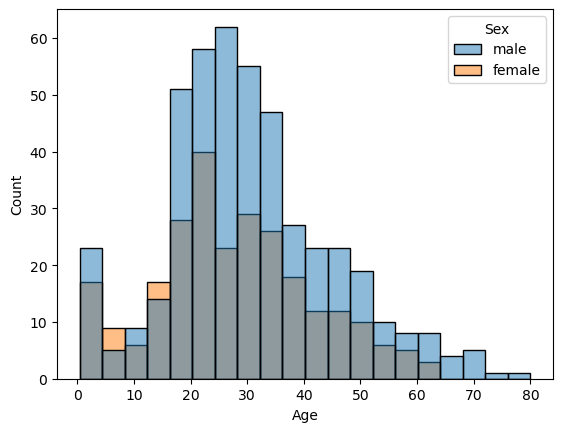

In [17]:
# Histogram of age for male vs female
sns.histplot(titanic, x = "Age", hue = "Sex")

In [18]:
titanic.value_counts("Sex")

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

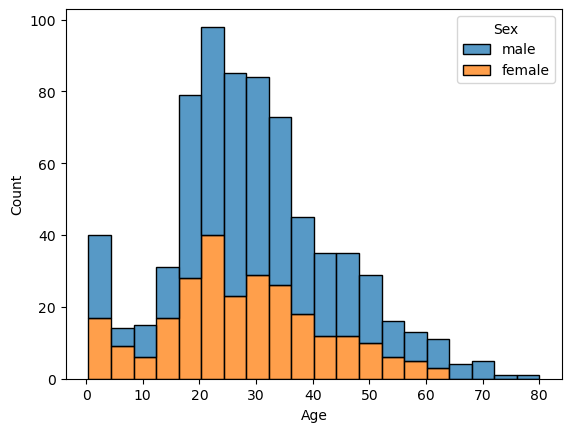

In [19]:
sns.histplot(titanic, x = "Age", hue = "Sex", multiple = "stack")

<Axes: xlabel='Age', ylabel='Count'>

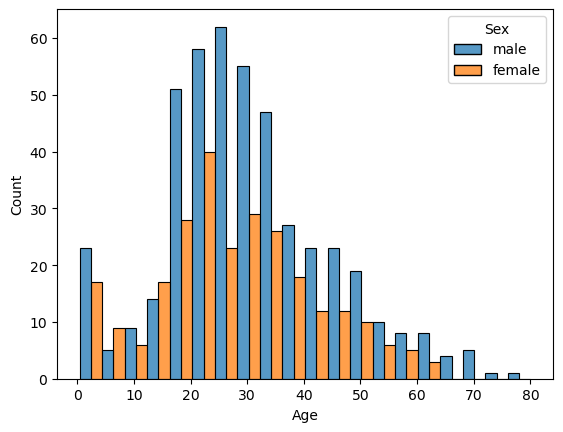

In [20]:
sns.histplot(titanic, x = "Age", hue = "Sex", multiple = "dodge")

In [21]:
# Use facet grids to present age histogram of two different sexes in separate grids

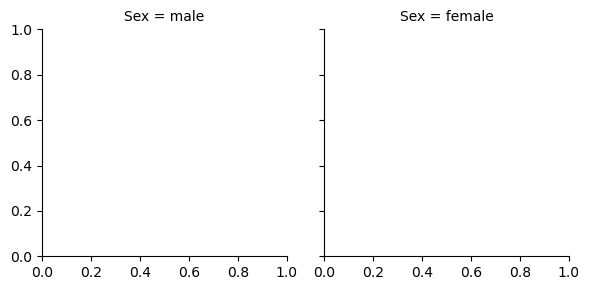

In [22]:
g1 = sns.FacetGrid(titanic, col = "Sex", hue = "Sex")
g1

In [23]:
g1.map(sns.histplot, 'Age')

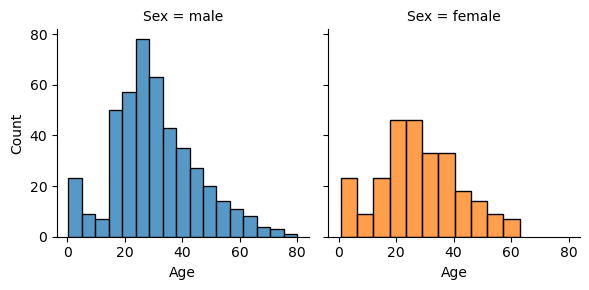

In [24]:
g1 = sns.FacetGrid(titanic, col = "Sex", hue = "Sex")
g1.map(sns.histplot, 'Age')

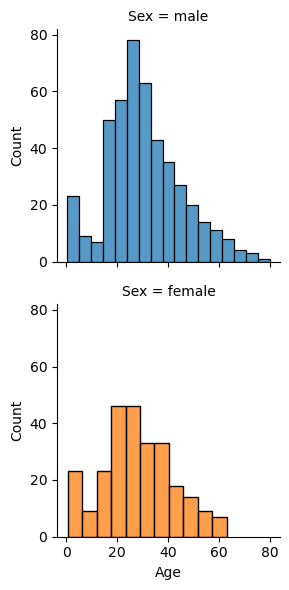

In [25]:
g1 = sns.FacetGrid(titanic, row = "Sex", hue = "Sex")
g1.map(sns.histplot, 'Age')

In [26]:
?g1.map

Signature: g1.map(func, *args, **kwargs)
Docstring:
Apply a plotting function to each facet's subset of the data.

Parameters
----------
func : callable
    A plotting function that takes data and keyword arguments. It
    must plot to the currently active matplotlib Axes and take a
    `color` keyword argument. If faceting on the `hue` dimension,
    it must also take a `label` keyword argument.
args : strings
    Column names in self.data that identify variables with data to
    plot. The data for each variable is passed to `func` in the
    order the variables are specified in the call.
kwargs : keyword arguments
    All keyword arguments are passed to the plotting function.

Returns
-------
self : object
    Returns self.
File:      /opt/conda/lib/python3.12/site-packages/seaborn/axisgrid.py
Type:      method

In [28]:
# Example
matrix_ex = np.array([[1,2,3], [4,5,6]])

In [29]:
matrix_ex

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
list(map(np.mean, matrix_ex))

[np.float64(2.0), np.float64(5.0)]

In [32]:
# Boxplots

<Axes: ylabel='Fare'>

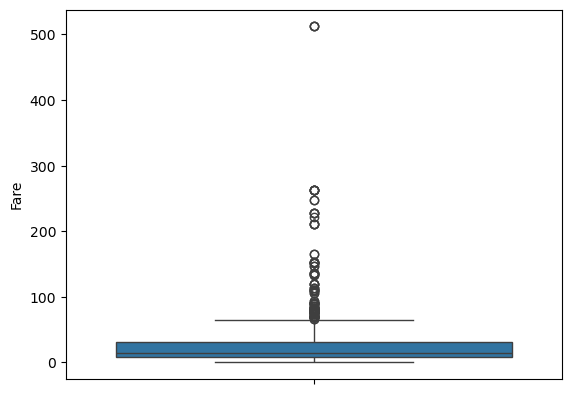

In [33]:
sns.boxplot(data = titanic, y = "Fare")

<Axes: xlabel='Pclass', ylabel='Fare'>

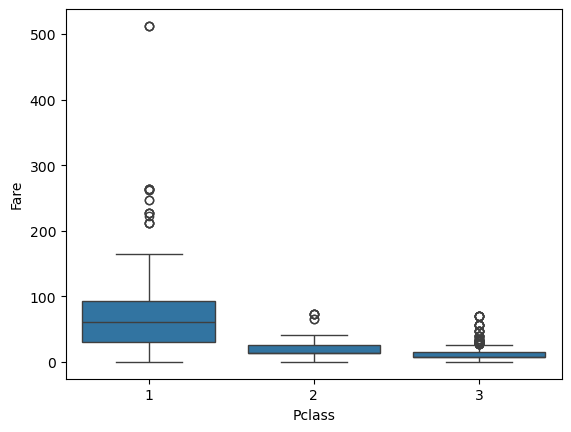

In [34]:
# Distribution of ticket fare across different cabin classes
sns.boxplot(data = titanic, y = "Fare", x = "Pclass")

<Axes: xlabel='Pclass', ylabel='Fare'>

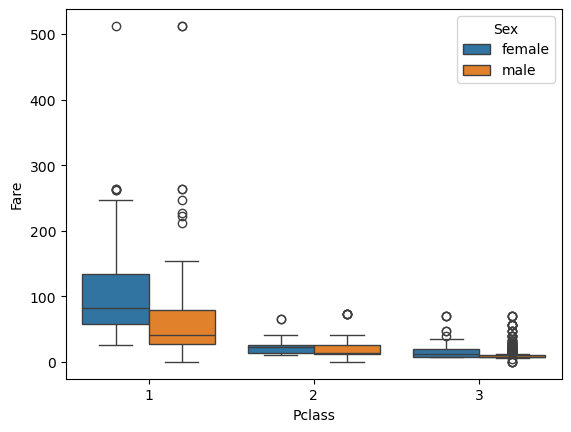

In [35]:
sns.boxplot(data = titanic, x = "Pclass", y = "Fare", hue = "Sex") 

In [36]:
# Compare the distribution of age of passengers across cabin classes

<Axes: xlabel='Pclass', ylabel='Age'>

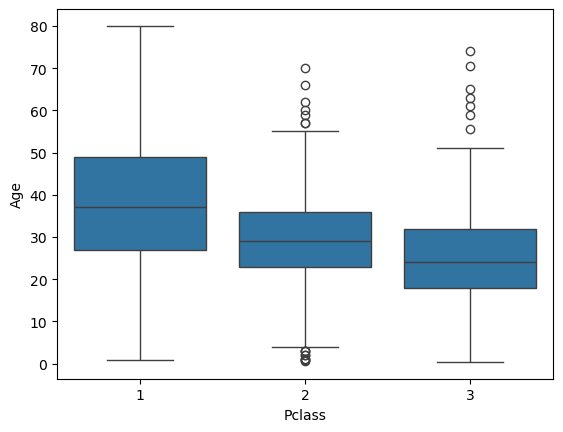

In [37]:
sns.boxplot(data = titanic, x = "Pclass", y = "Age") 

In [38]:
# Countplot: frequency of data from each group of a categorical data

In [39]:
# First let us convert the data type of "Pclass" into categorical

In [40]:
titanic["Pclass"] = pd.Categorical(titanic["Pclass"])

In [41]:
titanic.dtypes

Survived       int64
Pclass      category
Sex           object
Age          float64
Fare         float64
dtype: object

<Axes: xlabel='Pclass', ylabel='count'>

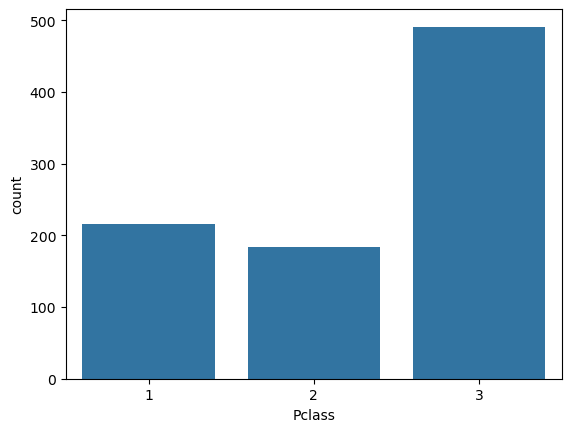

In [42]:
sns.countplot(titanic, x = "Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

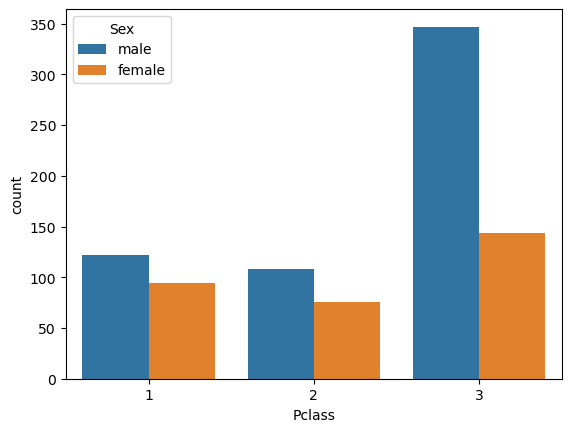

In [43]:
sns.countplot(titanic, x = "Pclass", hue = "Sex")

<Axes: xlabel='Pclass', ylabel='count'>

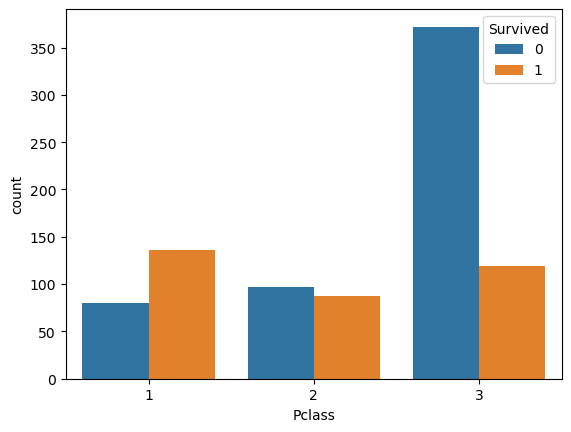

In [44]:
# compare the number of the survived from each class
sns.countplot(titanic, x = "Pclass", hue = "Survived")

/opt/conda/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


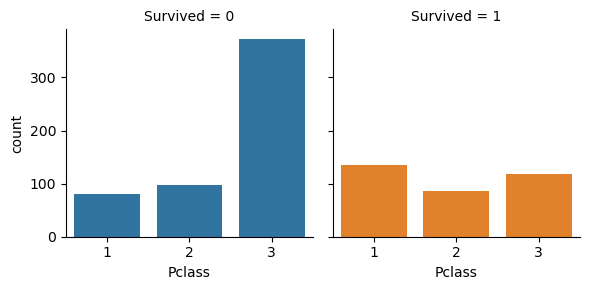

In [45]:
# Use facet grid once again
g2 = sns.FacetGrid(titanic, col = 'Survived', hue = "Survived")
g2.map(sns.countplot, "Pclass")

In [46]:
# Exercise

storms = pd.read_csv('storm.csv')
storms_cut = storms.iloc[0:159, :] # selecting only the first 159 rows
storms_cut['time'] = pd.to_datetime(storms_cut['time'])
storms_cut.head()

/tmp/ipykernel_51/422412693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  storms_cut['time'] = pd.to_datetime(storms_cut['time'])


,name,time,lat,long,status,wind,pressure
0,Amy,1975-06-27 00:00:00+00:00,27.5,-79.0,tropical depression,25,1013
1,Amy,1975-06-27 06:00:00+00:00,28.5,-79.0,tropical depression,25,1013
2,Amy,1975-06-27 12:00:00+00:00,29.5,-79.0,tropical depression,25,1013
3,Amy,1975-06-27 18:00:00+00:00,30.5,-79.0,tropical depression,25,1013
4,Amy,1975-06-28 00:00:00+00:00,31.5,-78.8,tropical depression,25,1012


In [47]:
storms_cut.dtypes

name                     object
time        datetime64[ns, UTC]
lat                     float64
long                    float64
status                   object
wind                      int64
pressure                  int64
dtype: object

<Axes: xlabel='pressure', ylabel='Count'>

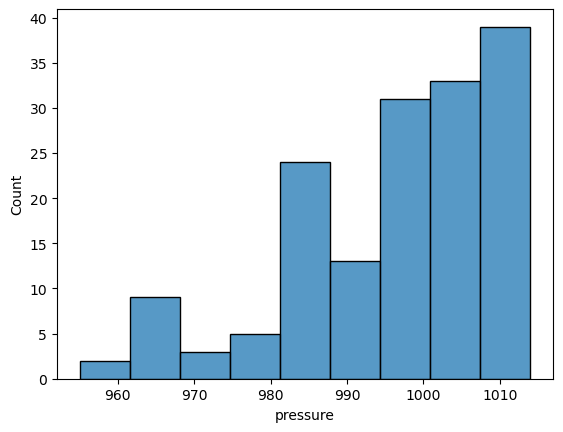

In [48]:
sns.histplot(storms_cut, x = "pressure")

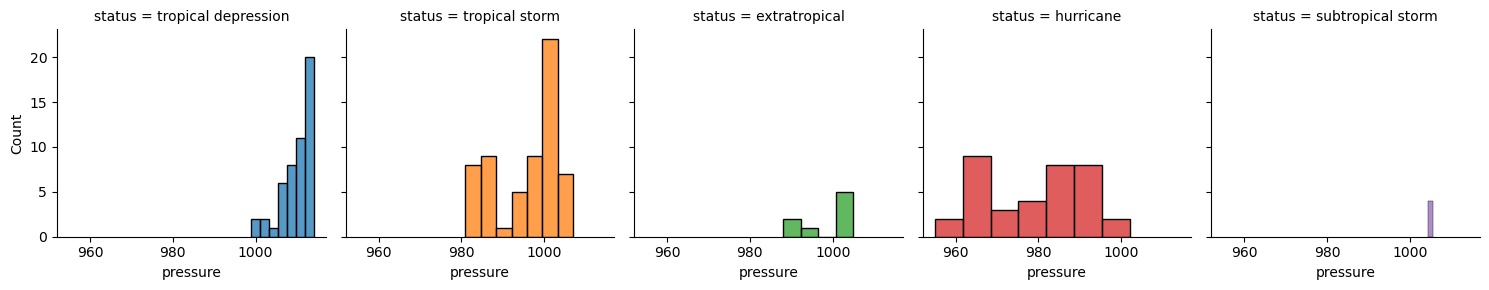

In [49]:
# Facet Grids
g = sns.FacetGrid(storms_cut, col = "status", hue = "status")
g.map(sns.histplot, "pressure")

<Axes: xlabel='name', ylabel='pressure'>

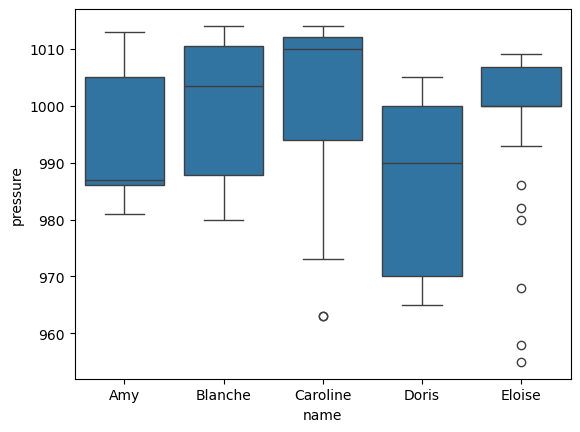

In [50]:
sns.boxplot(storms_cut, x = "name", y = "pressure")

<Axes: xlabel='name', ylabel='count'>

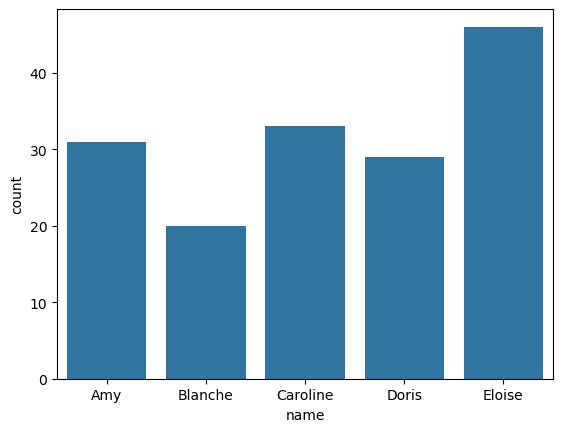

In [51]:
sns.countplot(storms_cut, x = "name") 

In [52]:
# Scatter plot: data from two numerical variables

<Axes: xlabel='Age', ylabel='Fare'>

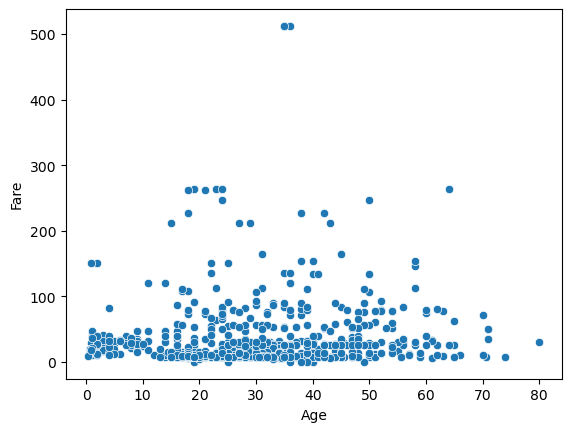

In [53]:
sns.scatterplot(data = titanic, x = "Age", y = "Fare") 

<Axes: xlabel='Age', ylabel='Fare'>

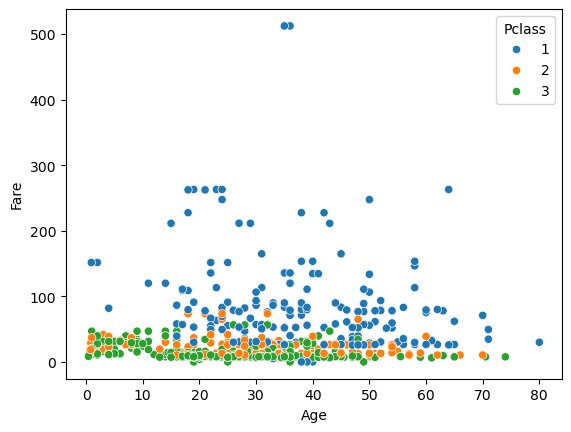

In [54]:
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Pclass") 

<Axes: xlabel='Age', ylabel='Fare'>

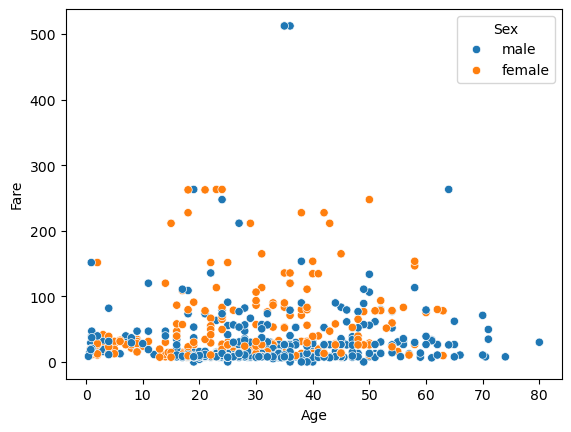

In [55]:
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex") 

<Axes: xlabel='Age', ylabel='Fare'>

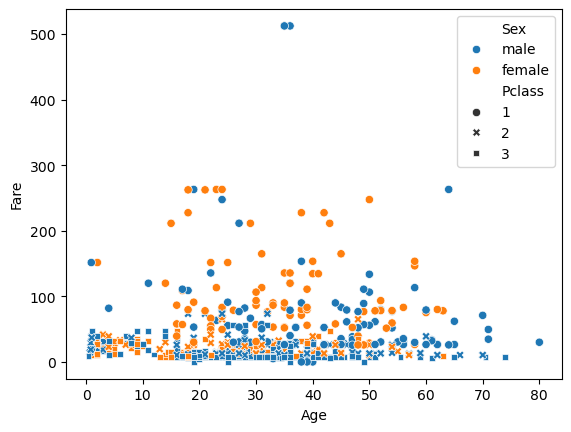

In [57]:
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex", style = "Pclass")

In [58]:
# Special Plots

In [59]:
# pair plot

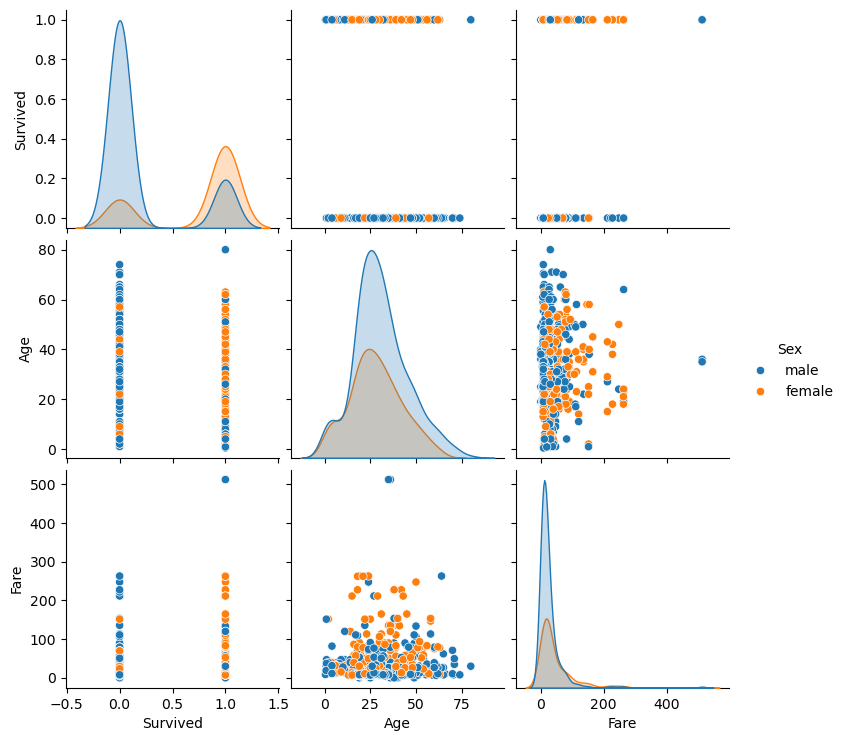

In [60]:
sns.pairplot(titanic, hue = "Sex")

In [62]:
# Heatmap

# frequency of data from each group of sex and passenger class

titanic_summary = titanic.groupby(['Sex', 'Pclass'])['Fare'].count()

/tmp/ipykernel_51/1339222865.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_summary = titanic.groupby(['Sex', 'Pclass'])['Fare'].count()


In [63]:
titanic_summary

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Fare, dtype: int64

In [64]:
titanic_summary.columns

AttributeError: 'Series' object has no attribute 'columns'

In [66]:
titanic_summary = pd.DataFrame(titanic_summary)

In [69]:
titanic_summary = titanic_summary.reset_index()

In [70]:
titanic_summary

,Sex,Pclass,Fare
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


In [72]:
titanic_summary_wider = titanic_summary.pivot(index = ["Sex"], columns = "Pclass",
                                              values = "Fare")

In [73]:
titanic_summary_wider

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='Pclass', ylabel='Sex'>

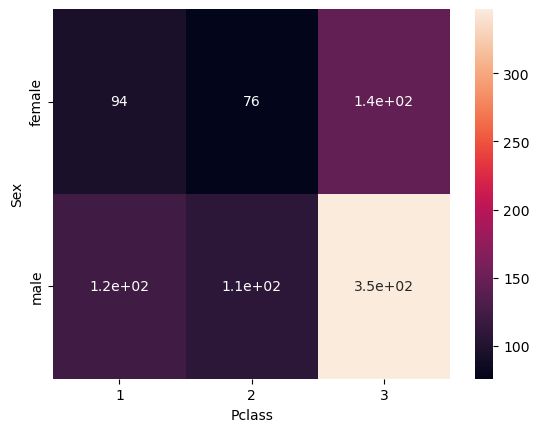

In [74]:
sns.heatmap(titanic_summary_wider, annot = True) 

In [76]:
# How to generate subplots

x = titanic["Age"]
y = titanic["Fare"]

Text(0.5, 1.0, 'Titanic Data Set: Age versus Fare')

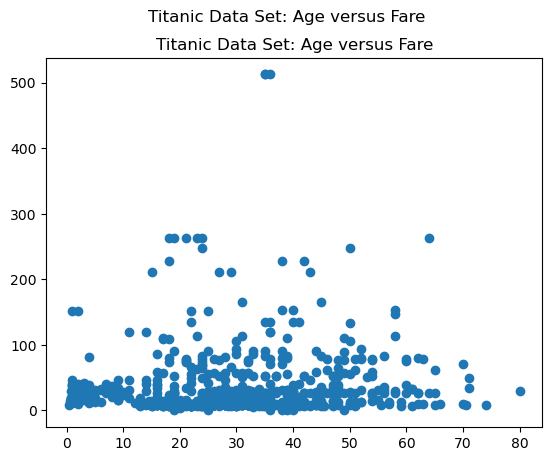

In [79]:
fig, ax = plt.subplots() # fig is a canvas, ax is axes (the actual plots)
ax.scatter(x, y)
fig.suptitle('Titanic Data Set: Age versus Fare')
ax.set_title('Titanic Data Set: Age versus Fare')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

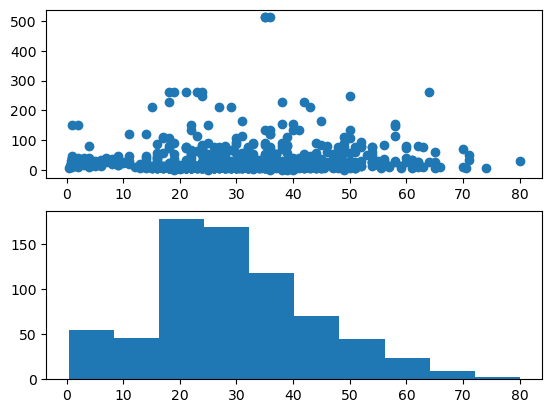

In [80]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.scatter(x, y)
ax2.hist(x)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

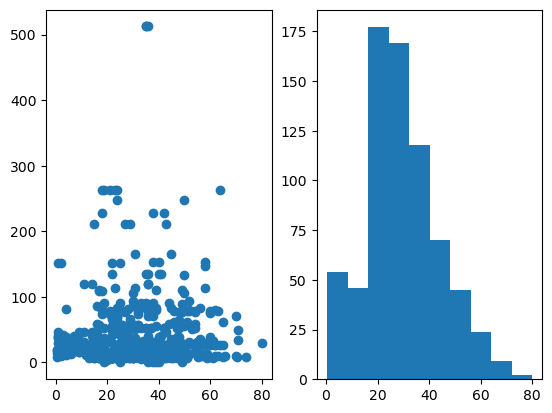

In [81]:
# horizontal stack
fig, axes = plt.subplots(1,2)
axes[0].scatter(x,y)
axes[1].hist(x) 

Text(0.5, 1.0, 'Histogram of Age')

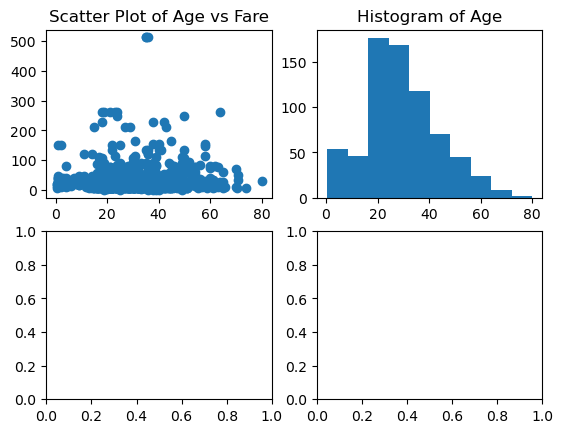

In [83]:
fig, axes = plt.subplots(2,2)
axes[0, 0].scatter(x, y)
axes[0, 0].set_title('Scatter Plot of Age vs Fare')
axes[0, 1].hist(x)
axes[0, 1].set_title('Histogram of Age')

In [84]:
# Refining our Plots

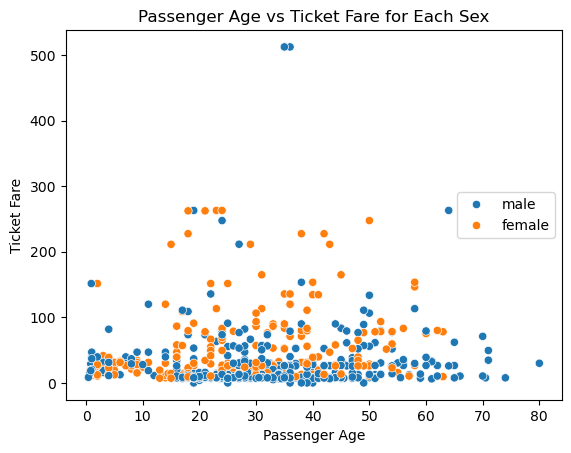

In [88]:
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex")
plt.title('Passenger Age vs Ticket Fare for Each Sex')
plt.xlabel('Passenger Age')
plt.ylabel('Ticket Fare')
#plt.legend(loc = 'right')

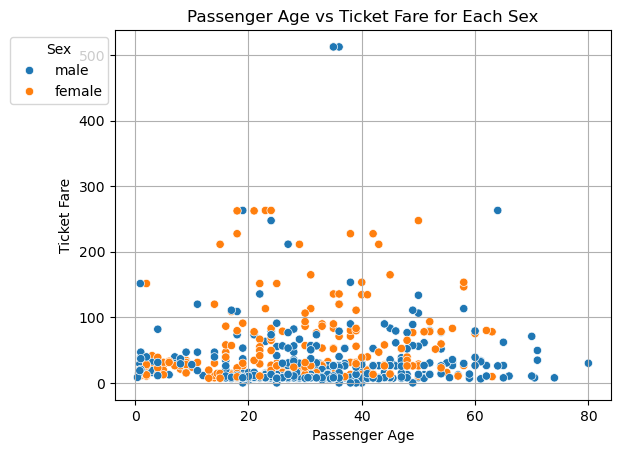

In [93]:
# Refining the location of the legend
ax = sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex")
plt.title('Passenger Age vs Ticket Fare for Each Sex')
plt.xlabel('Passenger Age')
plt.ylabel('Ticket Fare')
sns.move_legend(ax, "upper right", bbox_to_anchor = (0,1))
ax.set_xticks(range(0, 81, 20))
plt.grid()

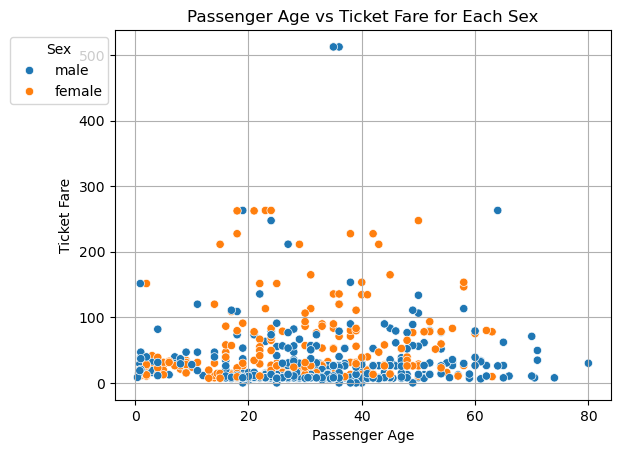

In [95]:
# How to save your plot?
# Refining the location of the legend
ax = sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Sex")
plt.title('Passenger Age vs Ticket Fare for Each Sex')
plt.xlabel('Passenger Age')
plt.ylabel('Ticket Fare')
sns.move_legend(ax, "upper right", bbox_to_anchor = (0,1))
ax.set_xticks(range(0, 81, 20))
plt.grid()
plt.savefig('text_plot.png')

In [96]:
# Exercise continued

<Axes: xlabel='wind', ylabel='pressure'>

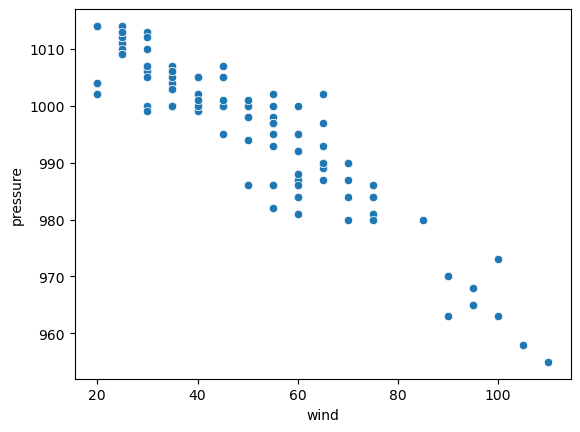

In [97]:
sns.scatterplot(storms_cut, x = 'wind', y = 'pressure')

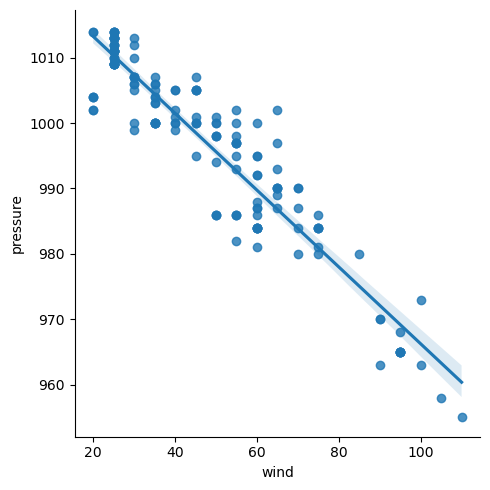

In [99]:
sns.lmplot(x = 'wind', y = 'pressure', data = storms_cut)

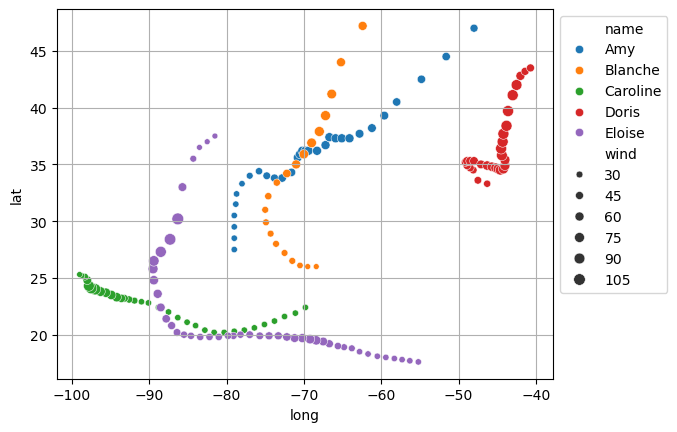

In [102]:
ax = sns.scatterplot(storms_cut, x = 'long', y = 'lat', hue = 'name', size = 'wind')
sns.move_legend(ax, "upper left", bbox_to_anchor = (1,1))
plt.grid()

<Axes: xlabel='time', ylabel='pressure'>

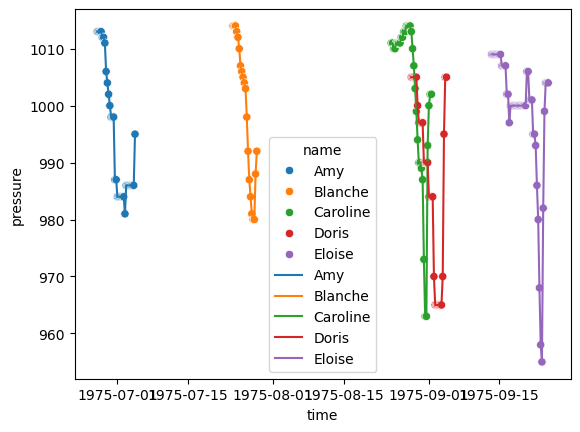

In [105]:
sns.scatterplot(storms_cut, x = 'time', y = 'pressure', hue = 'name') 
sns.lineplot(storms_cut, x = 'time', y = 'pressure', hue = 'name')